# DATA WRANGLING LAB REPORT 4

### Name:Tean Jin He
### Matric ID : SD21063
### Section: 02G

#### *Question 1: Describing the Scraping Process*

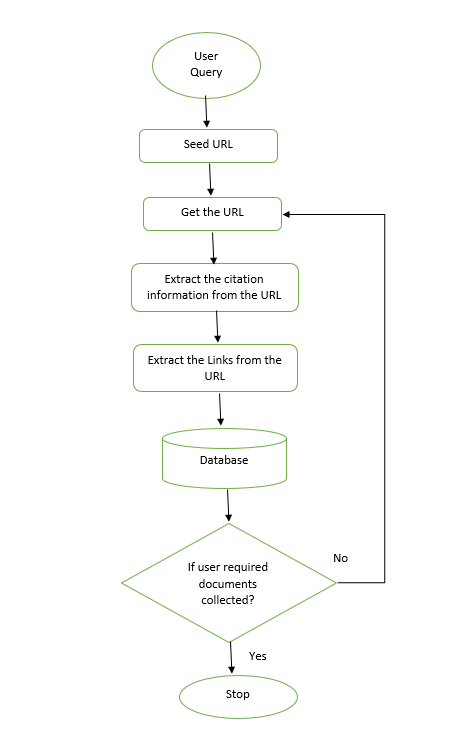

In [1]:
from IPython.display import Image
Image("Web Scraping.png")

#### *Question 2: Web scraping the website*

In [2]:
import requests
from bs4 import BeautifulSoup
PW = "https://en.wikipedia.org/wiki/Paul_Walker"
response = requests.get(PW)

# utility function to decode the contents of the response
def encoding_check(r):
    return (r.encoding)
def decode_content(r,encoding):
    return (r.content.decode(encoding))
contents = decode_content(response,encoding_check(response))

soup = BeautifulSoup(contents, 'html.parser')

In [3]:
txt_dump=soup.text

In [4]:
type(txt_dump)

str

In [5]:
len(txt_dump)

31454

In [6]:
# extract all information of text
print(txt_dump[:31454])





Paul Walker - Wikipedia



































Jump to content








Main menu





Main menu
move to sidebar
hide



		Navigation
	

Main pageContentsCurrent eventsRandom articleAbout WikipediaContact usDonate




		Contribute
	

HelpLearn to editCommunity portalRecent changesUpload file




Languages

Language links are at the top of the page across from the title.



















Search















Create accountLog in






Personal tools




 Create account Log in




		Pages for logged out editors learn more


ContributionsTalk


























Contents
move to sidebar
hide




(Top)





1Early life and education







2Career







3Personal life







4Death


				Toggle Death subsection
			




4.1Lawsuits









5Filmography







6Awards and nominations







7References







8External links













Toggle the table of contents






Toggle the table of contents







Paul Walker




90 languages



AfrikaansAnarâškielâالعربية

In [7]:
# Extra Introduction
idx1=txt_dump.find("RelativesCody Walker (brother)")
idx2=txt_dump.find("[3]")
print(txt_dump[idx1+len("RelativesCody Walker (brother)"):idx2])


Paul William Walker IV[1] (September 12, 1973[2] – November 30, 2013) was an American actor. He was known for his role as Brian O'Conner in the Fast & Furious franchise.
Paul Walker began his career as a child actor in the 1980s, gaining recognition in the 1990s after appearing in the television soap opera The Young and the Restless; he received praise for his performances in the teen comedy She's All That and the comedy-drama Varsity Blues (both 1999), and saw international fame by starring in The Fast and the Furious (2001).
He also starred in the commercially successful road thriller Joy Ride (2001), becoming an action star. He followed this with the box-office disappointments Into the Blue (2005) and Running Scared (2006), although he earned praise for his performance in the survival drama Eight Below, and for his portrayal of Hank Hansen in Flags of Our Fathers (both 2006). Outside of these, Walker largely appeared in low budget action films, but starred in the commercially succe

In [8]:
# Extract images
images = soup.find_all('img')
image_urls = [img['src'] for img in images]
print("\nImage URLs:")
print(image_urls)


Image URLs:
['/static/images/icons/wikipedia.png', '/static/images/mobile/copyright/wikipedia-wordmark-en.svg', '/static/images/mobile/copyright/wikipedia-tagline-en.svg', '//upload.wikimedia.org/wikipedia/en/thumb/1/1b/Semi-protection-shackle.svg/20px-Semi-protection-shackle.svg.png', '//upload.wikimedia.org/wikipedia/commons/thumb/9/91/PaulWalkerEdit-1.jpg/220px-PaulWalkerEdit-1.jpg', '//upload.wikimedia.org/wikipedia/en/thumb/9/99/Question_book-new.svg/50px-Question_book-new.svg.png', '//upload.wikimedia.org/wikipedia/commons/thumb/7/71/Fast_Five_Cast_2.jpg/250px-Fast_Five_Cast_2.jpg', '//upload.wikimedia.org/wikipedia/commons/thumb/0/0d/Nissan_Skyline_-_2_Fast_2_Furious.JPG/220px-Nissan_Skyline_-_2_Fast_2_Furious.JPG', '//upload.wikimedia.org/wikipedia/commons/thumb/8/8f/Herculesstreet.jpg/220px-Herculesstreet.jpg', '//upload.wikimedia.org/wikipedia/commons/thumb/b/bf/Grave_of_Paul_Walker.JPG/170px-Grave_of_Paul_Walker.JPG', '//upload.wikimedia.org/wikipedia/en/thumb/4/4a/Commons-

In [9]:
## Alternative method
from urllib.request import urlopen
from bs4 import BeautifulSoup

htmldata = urlopen("https://en.wikipedia.org/wiki/Paul_Walker")
soup = BeautifulSoup(htmldata, "html.parser")
images = soup.find_all('img')

print('Number of Images: ', len(images))

print("\nImage URLs:")
for item in images:
    print(item['src'])

Number of Images:  17

Image URLs:
/static/images/icons/wikipedia.png
/static/images/mobile/copyright/wikipedia-wordmark-en.svg
/static/images/mobile/copyright/wikipedia-tagline-en.svg
//upload.wikimedia.org/wikipedia/en/thumb/1/1b/Semi-protection-shackle.svg/20px-Semi-protection-shackle.svg.png
//upload.wikimedia.org/wikipedia/commons/thumb/9/91/PaulWalkerEdit-1.jpg/220px-PaulWalkerEdit-1.jpg
//upload.wikimedia.org/wikipedia/en/thumb/9/99/Question_book-new.svg/50px-Question_book-new.svg.png
//upload.wikimedia.org/wikipedia/commons/thumb/7/71/Fast_Five_Cast_2.jpg/250px-Fast_Five_Cast_2.jpg
//upload.wikimedia.org/wikipedia/commons/thumb/0/0d/Nissan_Skyline_-_2_Fast_2_Furious.JPG/220px-Nissan_Skyline_-_2_Fast_2_Furious.JPG
//upload.wikimedia.org/wikipedia/commons/thumb/8/8f/Herculesstreet.jpg/220px-Herculesstreet.jpg
//upload.wikimedia.org/wikipedia/commons/thumb/b/bf/Grave_of_Paul_Walker.JPG/170px-Grave_of_Paul_Walker.JPG
//upload.wikimedia.org/wikipedia/en/thumb/4/4a/Commons-logo.svg/2

In [10]:
# Extract table
table = soup.find('table', class_='infobox biography vcard')
table_rows = table.find_all('tr')
table_data = []

for row in table_rows:
    columns = row.find_all('td')
    table_data.append([col.get_text(strip=True) for col in columns])

print("\nTable Data:")
for row in table_data:
    print(row)


Table Data:
[]
['Walker at the premiere ofFast & Furiousin London, March 2009']
['Paul William Walker IV(1973-09-12)September 12, 1973Glendale, California, U.S.']
['November 30, 2013(2013-11-30)(aged\xa040)Santa Clarita, California, U.S.']
['Combined effects of traumatic and thermal injuries sustained in asingle-vehicle collision']
['Forest Lawn Memorial ParkHollywood Hills, California, U.S.']
['Village Christian School']
['Actor']
['1975–2013']
['Meadow Walker(daughter)']
['Cody Walker(brother)']


In [11]:
## Alternative method
# Importing pandas
import pandas as pd

# The webpage URL whose table we want to extract
url = "https://en.wikipedia.org/wiki/Paul_Walker"

In [12]:
# Assign the table data to a Pandas dataframe
AwardStatistic_table = pd.read_html(url)[2]
AwardStatistic_table

,Year,Award,Category,Nominated work,Result
0,2002,MTV Movie Award,Best On-Screen Team,The Fast and the Furious,Won[a]
1,2011,Teen Choice Awards,Choice Movie Actor – Action,Fast Five,Nominated
2,2013,Teen Choice Awards,Choice Movie: Chemistry,Fast & Furious 6,Nominated[b]
3,2014,MTV Movie Award,Best On-Screen Duo,Fast & Furious 6,Won[a]
4,2015,Teen Choice Awards,Choice Movie Actor: Action,Furious 7,Won
5,2015,Teen Choice Awards,Choice Movie: Chemistry,Furious 7,Nominated[c]


In [13]:
# Store the dataframe in Excel file
AwardStatistic_table.to_excel("Award_Paul_Walker.xlsx")